# 20-data-exploration
> Exploratory data analysis

The purpose of this notebook series is to perform any desired exploration of the data.

#### Helpful packages and preliminaries

In [1]:
#Data processing and evaluation
import pandas as pd
import numpy as np

#Graphical display
import matplotlib.pyplot as plt
import seaborn as sns

#Graphing magics
%matplotlib inline

In [2]:
#Constants/globals
cleaned_data_filename = './data/stats_100r_5000x_8000y_1000s.csv'

### Assessment and visualization

In [3]:
#load and view data
data = pd.read_csv(cleaned_data_filename)
data.head(10)

,Unnamed: 0,id,x,y,2001,2004,2006,2008,2011,2013,2016,2019,changed_01_19
0,0,0,514779.503196,1.497500e+06,21,21,21,21,21,21,21,21,0
1,1,1,514879.503196,1.497500e+06,41,43,41,43,41,43,43,43,1
2,2,2,514979.503196,1.497500e+06,21,21,21,21,21,21,21,21,0
3,3,3,515079.503196,1.497500e+06,21,22,21,22,21,22,21,22,1
4,4,4,515179.503196,1.497500e+06,21,22,21,22,21,22,21,22,1
5,5,5,515279.503196,1.497500e+06,21,21,21,21,21,21,21,21,0
6,6,6,515379.503196,1.497500e+06,21,22,21,22,21,22,21,22,1
7,7,7,515479.503196,1.497500e+06,21,21,21,21,21,21,21,21,0
8,8,8,515579.503196,1.497500e+06,22,22,22,22,22,22,22,22,0
9,9,9,515679.503196,1.497500e+06,22,23,22,23,22,23,22,23,1


In [4]:
#view information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     90000 non-null  int64  
 1   id             90000 non-null  int64  
 2   x              90000 non-null  float64
 3   y              90000 non-null  float64
 4   2001           90000 non-null  int64  
 5   2004           90000 non-null  int64  
 6   2006           90000 non-null  int64  
 7   2008           90000 non-null  int64  
 8   2011           90000 non-null  int64  
 9   2013           90000 non-null  int64  
 10  2016           90000 non-null  int64  
 11  2019           90000 non-null  int64  
 12  changed_01_19  90000 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 8.9 MB


In [5]:
#view info about numerical data
data.describe()

,Unnamed: 0,id,x,y,2001,2004,2006,2008,2011,2013,2016,2019,changed_01_19
count,90000.000000,90000.000000,90000.000000,9.000000e+04,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000
mean,44999.500000,44999.500000,529729.503196,1.482550e+06,77.347500,77.841056,77.172889,77.825711,77.145089,77.794367,77.882022,77.757411,0.064833
std,25980.906451,25980.906451,8660.254038,8.660254e+03,16.991501,16.275977,17.297662,16.304450,17.340235,16.358397,16.249393,16.420529,0.246233
min,0.000000,0.000000,514779.503196,1.467600e+06,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,0.000000
25%,22499.750000,22499.750000,522254.503196,1.475075e+06,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,0.000000
50%,44999.500000,44999.500000,529729.503196,1.482550e+06,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,0.000000
75%,67499.250000,67499.250000,537204.503196,1.490025e+06,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,0.000000
max,89999.000000,89999.000000,544679.503196,1.497500e+06,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,1.000000


In [6]:
#view correlation information
#pp = sns.pairplot(data)

In [7]:
#view distribution about numerical columns
#vp = sns.violinplot(data)

### Exploration

In [9]:
def calc(row1, row2, lst):
    if (row1 not in lst) and (row2 in lst):
        return 1
    else:
        return 0

In [10]:
def calc_dev(row):
    lst = [21,22,23,24]
    if (row['2001'] not in lst) and (row['2019'] in lst):
        return 1
    else:
        return 0

In [11]:
def calc_dev_2(row):
    years = [2001,2004,2006,2008,2011,2013,2016,2019]
    natural_land = [41,42,43,52,71,81,82,90,95]
    developed_land = [21,22,23,24]
    if (row[str(years[-1])] in developed_land):
        for year in years:
            if (row[str(year)] in natural_land):
                return 1
    else:
        return 0

In [12]:
df = data

In [13]:
df['developed'] = df.apply(calc_dev_2, axis=1)

In [19]:
df

,Unnamed: 0,id,x,y,2001,2004,2006,2008,2011,2013,2016,2019,changed_01_19,developed
0,0,0,514779.503196,1.497500e+06,21,21,21,21,21,21,21,21,0,NaN
1,1,1,514879.503196,1.497500e+06,41,43,41,43,41,43,43,43,1,0.0
2,2,2,514979.503196,1.497500e+06,21,21,21,21,21,21,21,21,0,NaN
3,3,3,515079.503196,1.497500e+06,21,22,21,22,21,22,21,22,1,NaN
4,4,4,515179.503196,1.497500e+06,21,22,21,22,21,22,21,22,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,89995,89995,544279.503196,1.467600e+06,82,82,82,82,82,82,82,82,0,0.0
89996,89996,89996,544379.503196,1.467600e+06,82,82,82,82,82,82,82,82,0,0.0
89997,89997,89997,544479.503196,1.467600e+06,82,82,82,82,82,82,82,82,0,0.0
89998,89998,89998,544579.503196,1.467600e+06,82,82,82,82,82,82,82,82,0,0.0


In [15]:
developed = df[df["developed"] == 1]

In [18]:
developed

,Unnamed: 0,id,x,y,2001,2004,2006,2008,2011,2013,2016,2019,changed_01_19,developed
41,41,41,518879.503196,1.497500e+06,21,82,21,82,21,82,82,22,1,1.0
74,74,74,522179.503196,1.497500e+06,82,21,82,21,82,21,21,23,1,1.0
114,114,114,526179.503196,1.497500e+06,82,21,82,21,82,21,21,21,1,1.0
159,159,159,530679.503196,1.497500e+06,82,21,82,21,82,21,21,21,1,1.0
302,302,302,514979.503196,1.497400e+06,41,21,41,21,41,21,41,21,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89751,89751,89751,519879.503196,1.467600e+06,82,21,82,21,82,21,21,21,1,1.0
89805,89805,89805,525279.503196,1.467600e+06,82,22,82,22,82,22,22,22,1,1.0
89945,89945,89945,539279.503196,1.467600e+06,21,82,21,82,21,82,82,21,0,1.0
89965,89965,89965,541279.503196,1.467600e+06,82,21,82,21,82,21,21,21,1,1.0


In [20]:
x_graph = developed['x'].to_numpy()
y_graph = developed['y'].to_numpy()

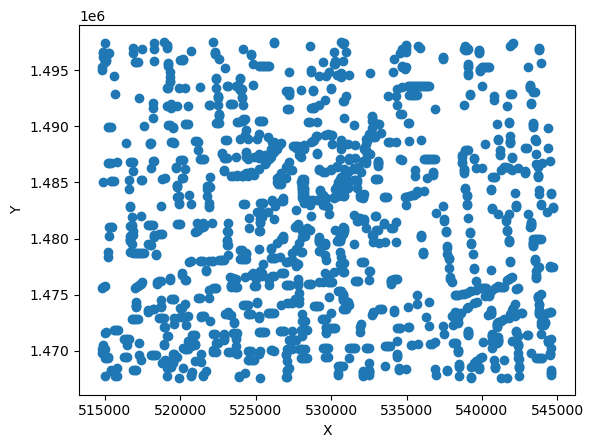

In [21]:
#colors = np.where((y == 1), 'red', 'blue')
#plt.scatter(x_graph, y_graph, c=colors)
plt.scatter(x_graph, y_graph)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()